https://www.kaggle.com/datasets/ahmedhamada0/brain-tumor-detection

In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.utils import normalize ,to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

## Data Extraction & Pre-processing

In [ ]:
image_directory = 'datasets/'
no_tumor_images = os.listdir(image_directory + 'no')
yes_tumor_images = os.listdir(image_directory + 'yes')
dataset = []
label = []
INPYT_SIZE = 128
type(no_tumor_images)

In [ ]:
len(no_tumor_images)

In [ ]:
path = 'no0.jpg'
print(path.split('.'))
print(path.split('.')[1])

In [ ]:
# Check all images in a directory with the file extension '.jpg'

# Filter the list to only include files with the '.jpg' extension
jpg_files = [file for file in no_tumor_images if file.lower().endswith('.jpg')]
print("Number of JPG files in the directory:", len(jpg_files))

In [ ]:
# Print the list of jpg files
print("JPG files in the directory:")
for jpg_file in jpg_files:
    print(jpg_file)

In [ ]:
# OR 
# FOR NO
for i, image_name in enumerate(no_tumor_images): # return dic.
    if(image_name.split('.')[1] == 'jpg'):
        # Read an image in BGR format
        image_path = os.path.join(image_directory, 'no', image_name)
        image_bgr = cv2.imread(image_path)
        # Rezies
        image_resized = cv2.resize(image_bgr, (INPYT_SIZE, INPYT_SIZE))
        # Convert BGR to RGB
        image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)
        # Convert the image to a NumPy array
        image_array = np.array(image_rgb)
        # Append the İmages & Labels
        dataset.append(image_array)
        label.append(0)

In [ ]:
plt.imshow(dataset[0])
plt.title("No Tumor Image")
plt.show()

In [ ]:
# FOR YES
for i, image_name in enumerate(yes_tumor_images): # return dic.
    if(image_name.split('.')[1] == 'jpg'):
        # Read an image in BGR format
        image_path = os.path.join(image_directory, 'yes', image_name)
        image_bgr = cv2.imread(image_path)
        # Rezies
        image_resized = cv2.resize(image_bgr, (INPYT_SIZE, INPYT_SIZE))
        # Convert BGR to RGB
        image_rgb = cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB)
        # Convert the image to a NumPy array
        image_array = np.array(image_rgb)
        # Append the İmages & Labels
        dataset.append(image_array)
        label.append(1)

In [ ]:
print(len(dataset))
print(len(label))

In [ ]:
label[2000]

In [ ]:
plt.imshow(dataset[2000])
plt.title("Tumor Image")
plt.show()

In [ ]:
print(type(dataset))
print(type(label))

## Split the dataset

In [ ]:
dataset = np.array(dataset)
label = np.array(label)

In [ ]:
# The stratify parameter in train_test_split is used to ensure that the distribution of the target variable is similar in both the training and testing datasets.
# This is particularly useful when dealing with imbalanced datasets, where one class may be underrepresented.

# we have a balanced dataset with an equal number of samples for each class (1500 images for 'no_tumor' and 1500 images for 'yes_tumor'),
# we might not necessarily need to use the stratify

# Split the dataset into training and testing sets, stratified by the labels
# X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2, random_state=0, stratify=label)

X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2, random_state=0, shuffle=True)

X_train.shape, X_test.shape, y_train.shape, y_test.shape
# Shape_X = (n_iamges, image_width, image_height, n_channel(RGB))

## Normalize Data

In [ ]:
# OR 
# Normalize the pixel values to the range [0, 1]
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

In [ ]:
# Choose an index for the sample image
sample_index = 100

# Original image
original_image = X_train[sample_index]

# Normalized image
normalized_image = X_train_normalized[sample_index]

# Display the original and normalized images
plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

# Normalized image
plt.subplot(1, 2, 2)
plt.imshow(normalized_image)
plt.title('Normalized Image')
plt.axis('off')

plt.show()

In [ ]:
sample_index = 0

# Original pixel values
original_pixel_values = X_train[sample_index]

# Normalized pixel values
normalized_pixel_values = X_train_normalized[sample_index]

# Print the pixel values
print("Original Pixel Values:")
print(original_pixel_values)

print("\nNormalized Pixel Values:")
print(normalized_pixel_values)

##### Now, X_train_normalized and X_test_normalized will contain the normalized pixel values, and each pixel value will be scaled to the range [0, 1].

In [ ]:
X_train = X_train_normalized
X_test = X_test_normalized

## Build CNN_Model

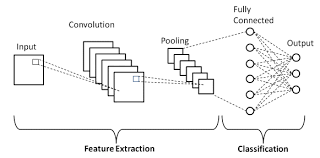

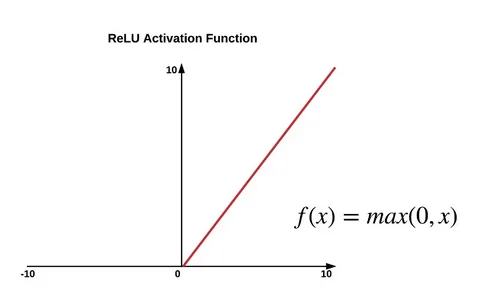

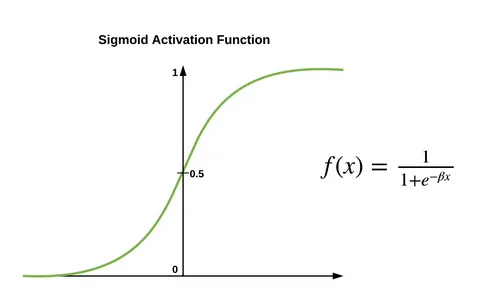

#### NOTES: The kernel_initializer in a neural network is a parameter that defines the method used to initialize the weights (or kernels) of the neurons in a layer.

kernel_initializer='glorot_normal' : This initializer is suitable for tanh or sigmoid activations.

kernel_initializer='glorot_uniform' : Similar to Glorot Normal, but with weights initialized from a uniform distribution.

kernel_initializer='he_normal' : This initializer is often used with ReLU activations

kernel_initializer='he_uniform' : Similar to He Normal, but with weights initialized from a uniform distribution.

### NOTE: loss function
#### Binary CrossEntropy -> output_layer(1, sigmoid)
#### Categorigal CrossEntropy -> output_layer(2, softmax)

In [ ]:
model = Sequential()
# 32: This represents the number of filters (or kernels). Each filter is responsible for detecting different features in the input image.
# (3, 3): This is the size of each filter. each filter has a 3x3 grid size. The size of the filter determines the spatial extent over which the filter is applied to the input. Smaller filter sizes capture fine-grained features, while larger filter sizes capture more global features.
#  Rectified Linear Unit (ReLU) activation function 

model.add(Conv2D(32, (3, 3), input_shape=(INPYT_SIZE, INPYT_SIZE, 3), activation='relu'))
# model.add(Activation('relu'))
# pool size of (2, 2), which means it will take the maximum value within each 2x2 region of the input
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', activation='relu'))
# model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', activation='relu'))
# model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
# model.add(Activation('relu'))
# The dropout layer helps prevent overfitting by randomly dropping a fraction of neurons during training.
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) # output layer
# model.add(Activation('sigmoid'))

In [ ]:
# Print the model summary to see the architecture
model.summary()

In [ ]:
# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### NOTE: Batch size
batch size depends on various factors, including the available memory and the size of your dataset. Smaller batch sizes might be beneficial for models with limited memory, while larger batch sizes can improve computational efficiency.

### NOTE: verbose
verbose=0: Silent mode. No output during training.

verbose=1: Progress bar. It shows a progress bar for each epoch, including metrics like loss and accuracy.


verbose=2: One line per epoch. It shows one line of output for each epoch, including metrics.


verbose=3: One line per training step. It shows one line of output for each update to the model.el.

### NOTE: Epochs
The model will be trained for 10 epochs. During each epoch, the entire training dataset (X_train and y_train) will be processed in batches of size 16 (specified by batch_size). After each epoch, the model's performance on the validation dataset (X_test and y_test) will be evaluated.

In [ ]:
# Fit (Train) the Model
model.fit(X_train, y_train, 
          batch_size=16, 
          verbose=1, epochs=10,
          validation_data=(X_test, y_test),
          shuffle=True)

## Metrices

In [ ]:
y_pred = model.predict(X_test)
# Convert predicted probabilities to binary predictions (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
print('Confusion Matrix:')
print(cm)

In [ ]:
# Calculate accuracy and precision
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)

In [ ]:
accuracy, precision

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Plot the confusion matrix
labels = [0,1]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)

plt.show()

## Save the Model

In [ ]:
model.save('Our_model.h5')

## Test Our Model

In [ ]:
from keras.models import load_model
model_loaded = load_model('Our_model.h5')

### NOTE: Expand_dim
The line new_image = np.expand_dims(new_image, axis=0) is used to add an extra dimension to the array to match the input shape expected by the model. This is necessary because the predict method of a Keras model expects the input data to have a certain shape, which includes the batch dimension.

Before the expansion: new_image.shape is (height, width, channels)
After the expansion: new_image.shape becomes (1, height, width, channels)

In [ ]:
# Load and preprocess the new image
image_folder = 'pred'
image_name = 'pred0.jpg'
image_path = os.path.join(image_folder, image_name)

new_image = cv2.imread(image_path)
new_image = cv2.resize(new_image, (128, 128))  # Resize to match the input size of your model
new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
new_image = new_image.astype(np.float32) / 255.0  # Normalize pixel values

# Reshape the image to match the input shape expected by your model
new_image = np.expand_dims(new_image, axis=0)

# Make predictions
prediction = model.predict(new_image)

# Interpret the prediction
if prediction[0, 0] > 0.5:
    print('The model predicts that the image contains a tumor.')
else:
    print('The model predicts that the image does not contain a tumor.')

In [ ]:
prediction